<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Linear_systems_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals:
- Show how to compute matrix decompositions
- Apply decomposed matrix to solve linear systems
- Explain matrix types and decompositions


# LU decomposition

Commonly we will have to repeatedly solve
$Ax = b$ for multiple $b_i$. Gauss Elimination for each $b_i$ would be grossly inefficient. If you knew all the $b_i$ in advance you could do this in parallel by forming the augmented matrix:

$[A|b_1 \ b_2 \  b_3 \ ...]$

but this is seldom the case.

It is much more efficient to decompose the matrix $A$ into a form that is easier to solve.

> There are other reasons to do this for special matrix types and distributed computing which we will discuss later.

We have actually already seen this efficiency boost with back-substitution. The equation $U x = b$ solves in $O(n^2)$.


Any square matrix can be decomposed,

$A = LU$

where:

$L$ is a lower triangular matrix

$U$ is an upper triangular matrix

Now, the linear system becomes:

$$
\begin{eqnarray*}
Ax &= b \\
LUx &= b
\end{eqnarray*}
$$

Now let $y = Ux$, such that

$$\begin{eqnarray*}
Ly &= b \\
Ux &= y
\end{eqnarray*} $$
both of which solve in $O(n^2)$.

NOTE: L and U are generally *not unique*.





Example: Return to the previouis example:

\begin{eqnarray*}
4x_1 + 3x_2 - 5x_3 &=& 2 \\
-2x_1 - 4x_2 + 5x_3 &=& 5 \\
8x_1 + 8x_2  &=& -3 \\
\end{eqnarray*}

Through Gaussian Elimination, we found

$$ U=
\begin{bmatrix}
4 & 3 & -5 \\
0 & -2.5 & 2.5 \\
0 & 0 & 12 \\
\end{bmatrix}$$

by clearing the first column by multiplying the first row by $-0.5$ for the second row, and  $2$ for the third. The second column was cleared with the second row multiplied by $-0.8$. These coefficients turn out to be the elemements of the $L$ matrix (with 1's along the diagonal)!

$$ L=
\begin{bmatrix}
1 & 0 & 0 \\
-0.5 & 1 & 0 \\
2 & -0.8 & 1 \\
\end{bmatrix}$$

Let's verify:

In [23]:
# prompt: Do decomposition on the above matrix

import numpy as np

# Define the matrix A
A = np.array([[4, 3, -5],
              [-2, -4, 5],
              [8, 8, 0]])

print("The original matrix A is:\n", A, "\n")
L = np.array([[1,0,0],
               [-.5, 1,0],
               [2,-.8,1]])

U = np.array([[4,3,-5],
              [0,-2.5,2.5],
              [0,0,12]])

print("The reconstructed matrix is:\n", L@U)



The original matrix A is:
 [[ 4  3 -5]
 [-2 -4  5]
 [ 8  8  0]] 

The reconstructed matrix is:
 [[ 4.  3. -5.]
 [-2. -4.  5.]
 [ 8.  8.  0.]]


Let's check the package decomposition!

In [24]:
# Calculate the LU decomposition
from scipy.linalg import lu, inv
P, L, U = lu(A)

print("Permutation Matrix (P):\n", P)
print("Lower Triangular Matrix (L):\n", L)
print("Upper Triangular Matrix (U):\n", U)



print("\nMultiply L and U:\n", L@U, "\nwhich is correct but pivoted!")

print("\nMultiply PLU:\n", P@L@U, "\nwhich is the original matrix!")

Permutation Matrix (P):
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Lower Triangular Matrix (L):
 [[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.5   0.5   1.  ]]
Upper Triangular Matrix (U):
 [[ 8.   8.   0. ]
 [ 0.  -2.   5. ]
 [ 0.   0.  -7.5]]

Multiply L and U:
 [[ 8.  8.  0.]
 [-2. -4.  5.]
 [ 4.  3. -5.]] 
which is correct but pivoted!

Multiply PLU:
 [[ 4.  3. -5.]
 [-2. -4.  5.]
 [ 8.  8.  0.]] 
which is the original matrix!


NB: $P$ in the above is the permutation matrix that, when multiplied by LU recovers the original matrix. It is *not* the pivoting operation that is done internally (although that matrix is easily obtained!).

#Matrix types

LU decomposition has useful properties depending on the types of matricies involved.

|Symbol | Matrix Type | Example 2x2 | Interesting Properties |
| --- |---|---|---|
|0| Zero | $\begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}$ | A-A = 0 |
|I | Identity | $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ | A I = A |
|D|  Diagonal | $\begin{bmatrix} d_1 & 0 \\ 0 & d_2 \end{bmatrix}$ | $D^{-1}$ = $\begin{bmatrix} d_1^{-1} & 0 \\ 0 & d_2^{-1} \end{bmatrix}$ |
|U| Upper Triangular| $\begin{bmatrix} 1 & 2 \\ 0 & 4 \end{bmatrix}$ | $U^{-1}$ is another upper triangular matrix|
|L| Lower Triangular | $\begin{bmatrix} 5 & 0 \\ -1 & 2 \end{bmatrix}$ | $L^{-1}$ is another lower triangular matrix |
| P | Permutation | $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$ | Its transpose is its inverse ($P^T = P^{-1}$) |
| S | Symmetric | $\begin{bmatrix} 1 & 3 \\ 3 & -4 \end{bmatrix}$ |  Equal to its transpose ($S = S^T$). |
| SPD | Symmetric positive definite | $\begin{bmatrix} 1 & 3 \\ 3 & 4 \end{bmatrix}$ |  $x^T [SPD] x >0$  - think of a quadratic|


##Sparse matricies and sparsity patterns
Sparsity refers to the fraction of non-zero elements in a matrix. Sparse matricies have a significant fraction of 0 elements, which can **drastically** reduce storage and computational requirements.

Storage: Typically one (conceptually) stores a matrix as a 2D array. With significant sparsity, one can instead store only non-zero entries. There is a trade-off here between access / modification and memory efficiency.

Computation: (Fill-in)
Fill-in is the phenomena where, during computation, zeros become non-zeros. This disrupts the sparsity pattern and the benefits that accompany it, and is hence something to be avoided.





## Sparsity patterns and matrix

Sparsity patterns are condensly viewed as monochrome matricies filled in according to 0 or non-zero.

Example: A sparsity pattern from a finite element problem in 2D.

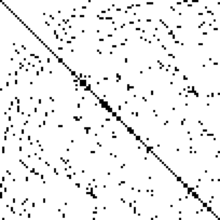

We already have examples of sparse matricies with
- diagonal
- upper and lower triangular
and have seen their importance in controlling complexity and roundoff error.

### Banded matricies

Banded matricies only have non-zero elements parallel to the diagonal. Sometimes they are described by the *bandwidth*, the number of parallel bands.



#### Tridiagonal (bandwidth 3)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


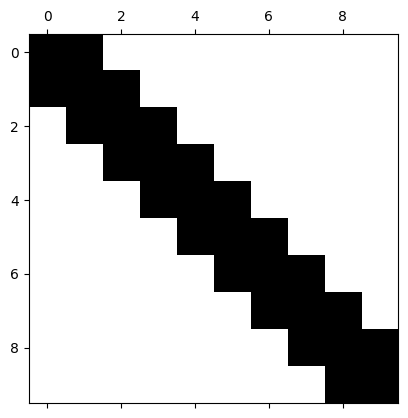

In [ ]:
# prompt: give me a tridiagonal matrix of dimension 10 and view its sparsity pattern with spy

import numpy as np
import matplotlib.pyplot as plt

# Create a tridiagonal matrix of dimension 10
n = 10
T = np.zeros((n, n))
np.fill_diagonal(T, 2)  # Main diagonal
np.fill_diagonal(T[1:], -1)  # Lower diagonal
np.fill_diagonal(T[:, 1:], -1)  # Upper diagonal

print(T)

# View the sparsity pattern
plt.spy(T)
plt.show()


#### Pentadiagonal (bandwidth 5)

[[ 2. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1. -1.  0.  0.  0.  0.  0.  0.]
 [-1. -1.  2. -1. -1.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  2. -1. -1.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  2. -1. -1.  0.  0.  0.]
 [ 0.  0.  0. -1. -1.  2. -1. -1.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  2. -1. -1.  0.]
 [ 0.  0.  0.  0.  0. -1. -1.  2. -1. -1.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1. -1.  2.]]


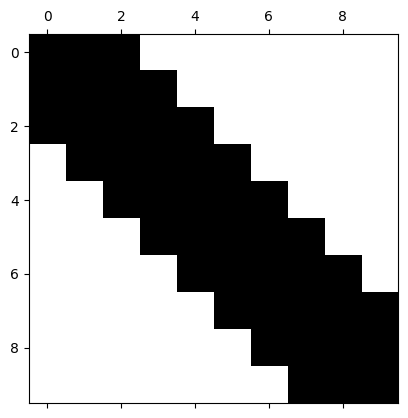

In [ ]:
# prompt: give me a pentadiagonal matrix of dimension 10 and view its sparsity pattern with spy

import numpy as np
import matplotlib.pyplot as plt

# Create a pentadiagonal matrix of dimension 10
n = 10
A = np.zeros((n, n))
np.fill_diagonal(A, 2)  # Main diagonal
np.fill_diagonal(A[1:], -1)  # Upper diagonal
np.fill_diagonal(A[:, 1:], -1)  # Lower diagonal
np.fill_diagonal(A[2:], -1)  # Second upper diagonal
np.fill_diagonal(A[:, 2:], -1)  # Second lower diagonal

print(A)

# View the sparsity pattern
plt.spy(A)
plt.show()


One can imagine the benefit of storing such a matrix

#### General banded matrix

[[ 2. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0. -1.  0.  0.]
 [-2.  0.  0. -1.  2. -1.  0.  0. -1.  0.]
 [ 0. -2.  0.  0. -1.  2. -1.  0.  0. -1.]
 [ 0.  0. -2.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0. -2.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0. -2.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0. -2.  0.  0. -1.  2.]]


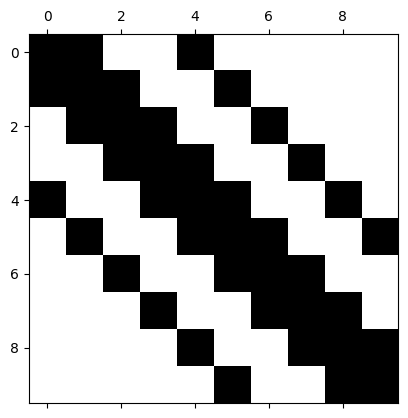

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a pentadiagonal matrix of dimension 10
n = 10
A = np.zeros((n, n))
np.fill_diagonal(A, 2)  # Main diagonal
np.fill_diagonal(A[1:], -1)  # Upper diagonal
np.fill_diagonal(A[:, 1:], -1)  # Lower diagonal
np.fill_diagonal(A[4:], -2)  # Second upper diagonal
np.fill_diagonal(A[:, 4:], -1)  # Second lower diagonal

print(A)

# View the sparsity pattern
plt.spy(A)
plt.show()

## Block matricies

Block matricies can be partitioned:

$$ M=
\begin{bmatrix}
2 & -1 & 0 & 1 & 0 & 0 \\
-1 & 2 & -1 & 0 & 1 & 0 \\
0 & -1 & 2 & 0 & 0 & 1 \\
1 & 0 & 0 & 2 & -1 & 0 \\
0 & 1 & 0 & -1 & 2 & -1 \\
0 & 0 & 1 & 0 & -1 & 2
\end{bmatrix} = \begin{bmatrix}
A & B \\
C & D
\end{bmatrix}
$$

with

$$
A=D = \begin{bmatrix}
2 & -1 & 0  \\
-1 & 2 & -1  \\
0 & -1 & 2 \\
\end{bmatrix}
$$

and

$$
B=C = \begin{bmatrix}
1 & 0 & 0  \\
0 & 1 & 0  \\
0 & 0 & 1 \\
\end{bmatrix}
$$

The inverse can be formed:

$$
M^{-1} =
\begin{bmatrix}
A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1} \\
-(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1}
\end{bmatrix}
$$

This is a substantial savings since the cost of each block scales exponentially!

Sometimes we get lucky and one of the blocks is $0$ or $I$ which is a HUGE benefit!

If the blocks are each $n \times n$, $M$ is $2n \times 2n$ and takes $O((2n)^3)$ to solve. But if we partition into blocks, the inverse can be formed in 2 separate $O(n^3)$ (plus matrix multiplications).

This situation arises commonly in multiphysics applications, with two fields (e.g.: T and c). The blocks are then defined corresponding to the unknown vectors for each field.

Certaint types of physics is solved more efficiently with certain solvers. This decomposition, sometimes called *operator splitting* or *segregated solving* allows each variable (block) to be treated optimally and inverse of the full system assembled.  

In contrast, solving the matrix as a whole is called a *monolithic* solution.

### Block diagonal

Taking $B=C=0$ in the above we can see the inverse of a *block diagonal* matrix is simply the diagonal assembly of the inverse of its blocks:

$$
\begin{bmatrix}
A & 0 \\
0 & D
\end{bmatrix}^{-1} = \begin{bmatrix}
A^{-1} & 0 \\
0 & D^{-1}
\end{bmatrix}
$$

# Matrix decompositions

We can now summarize some decompositions:

| Matrix equation | Operation count |
|---|---|
| $A = LU$ |  $n^3/3$ |
| $S = L D L^T$ | $n^3/6$|
| $SPD = L L^T$|  $n^3/6$ + n|

The later two are called Choleski decomposition and take advantage of matrix symmetry for efficiency.

Since in general

$A^{-1} = [LU]^{-1} = U^{-1} L^{-1}$

it would be tempting to calculate and store $A^{-1}$ instead of $L$ and $U$, but this is not preferred due to the impact on sparsity, in addition to round-off error $\propto |A|^{-1}$.

##Decompositions of certain matricies

### Inverse of a triangular matrix is triangular

In [ ]:
# prompt: show the inverse of an upper triangular matrix with numpy

import numpy as np
# Create an upper triangular matrix
A = np.array([[1, 2, 3],
              [0, 4, 5],
              [0, 0, 6]])

# Calculate the inverse
A_inv = np.linalg.inv(A)

print("Upper triangular matrix:\n", A)
print("\nInverse of the upper triangular matrix:\n", A_inv)


Upper triangular matrix:
 [[1 2 3]
 [0 4 5]
 [0 0 6]]

Inverse of the upper triangular matrix:
 [[ 1.         -0.5        -0.08333333]
 [ 0.          0.25       -0.20833333]
 [ 0.          0.          0.16666667]]


### LU decomposition of a banded matrix is banded-triangular

Original matrix:
 [[2.  1.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [1.  2.  1.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 1.  2.  1.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.1 1.  2.  1.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.1 1.  2.  1.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.1 1.  2.  1.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.1 1.  2.  1.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.1 1.  2.  1.  0.1]
 [0.  0.  0.  0.  0.  0.  0.1 1.  2.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 1.  2. ]]

Cholesky decomposition (L):
 [[1.41 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.71 1.22 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 0.78 1.18 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.08 0.79 1.17 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.08 0.8  1.16 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.09 0.8  1.16 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.09 0.8  1.16 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.09 0.8  1.16 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.09 0.8  1.16 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.09 0.

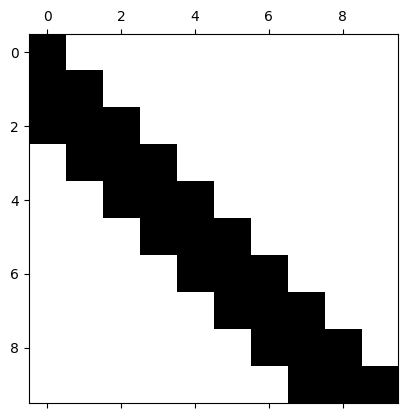

In [3]:
# prompt: Show that the choleski decomposition of a banded matrix is triangular-banded

import numpy as np
from scipy.linalg import cholesky
import matplotlib.pyplot as plt

# Create a pentadiagonal matrix of dimension 10
n = 10
A = np.zeros((n, n))
np.fill_diagonal(A, 2)  # Main diagonal
np.fill_diagonal(A[1:], 1)  # Upper diagonal
np.fill_diagonal(A[:, 1:], 1)  # Lower diagonal
np.fill_diagonal(A[2:], .1)  # Second upper diagonal
np.fill_diagonal(A[:, 2:], .1)  # Second lower diagonal

# Calculate the Cholesky decomposition
L = cholesky(A, lower=True)

print("Original matrix:\n", A)
print("\nCholesky decomposition (L):\n", np.around(L, decimals=2))

# View the sparsity pattern
plt.spy(L)
plt.show()


### Inverse of a banded matrix is **not** banded (except diagonal)

Banded matrix:

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


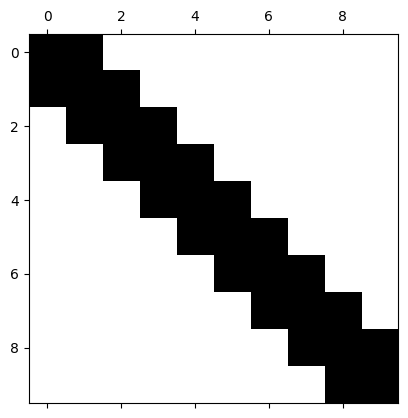


Inverse of the banded matrix:

[[0.90909091 0.81818182 0.72727273 0.63636364 0.54545455 0.45454545
  0.36363636 0.27272727 0.18181818 0.09090909]
 [0.81818182 1.63636364 1.45454545 1.27272727 1.09090909 0.90909091
  0.72727273 0.54545455 0.36363636 0.18181818]
 [0.72727273 1.45454545 2.18181818 1.90909091 1.63636364 1.36363636
  1.09090909 0.81818182 0.54545455 0.27272727]
 [0.63636364 1.27272727 1.90909091 2.54545455 2.18181818 1.81818182
  1.45454545 1.09090909 0.72727273 0.36363636]
 [0.54545455 1.09090909 1.63636364 2.18181818 2.72727273 2.27272727
  1.81818182 1.36363636 0.90909091 0.45454545]
 [0.45454545 0.90909091 1.36363636 1.81818182 2.27272727 2.72727273
  2.18181818 1.63636364 1.09090909 0.54545455]
 [0.36363636 0.72727273 1.09090909 1.45454545 1.81818182 2.18181818
  2.54545455 1.90909091 1.27272727 0.63636364]
 [0.27272727 0.54545455 0.81818182 1.09090909 1.36363636 1.63636364
  1.90909091 2.18181818 1.45454545 0.72727273]
 [0.18181818 0.36363636 0.54545455 0.72727273 0.

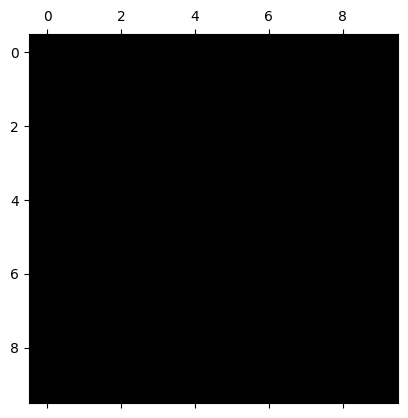

In [4]:
# prompt: show the inverse of a banded matrix in numpy

import numpy as np

# Create a tridiagonal matrix of dimension 10
n = 10
A = np.zeros((n, n))
np.fill_diagonal(A, 2)  # Main diagonal
np.fill_diagonal(A[1:], -1)  # Upper diagonal
np.fill_diagonal(A[:, 1:], -1)  # Lower diagonal

# Calculate the inverse
A_inv = np.linalg.inv(A)

print("Banded matrix:\n")
print(A)
plt.spy(A)
plt.show()
print("\nInverse of the banded matrix:\n")
print(A_inv)
plt.spy(A_inv)
plt.show()


Yikes!!! :-(


#Package implementations

Numpy and Scipy linear solvers both do (P)LU decomposition and then solution. In general they can be accessed through:

>numpy.linalg.solve(A,b)

and

>scipy.linalg.solve(A,b)

Examining the options of scipy show that you can choose to:
1. specify the matrix type
2. overwrite the original matricies (which may boost efficiency)

The advent of distributed computing (HPCs) motivated new algorithms that are better suited to large, sparse, systems (You will run in to these names in the future!)

- PARADISO (PARallel Direct SOlver)
- SuperLU (Supernodal LU)
- UMFPACK (Unsymmetric-pattern MultiFrontal method)
- MUMPS (Multifrontal Massively Parallel Sparse Direct Solver)


In [ ]:
# prompt: use numpy to solve a linear system then repeat with scipy

import numpy as np
from scipy.linalg import solve

# Define the coefficient matrix A
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

# Define the right-hand side vector b
b = np.array([1, 2, 3])

# Solve the linear system using numpy.linalg.solve
x_numpy = np.linalg.solve(A, b)
print("Solution using numpy.linalg.solve:\n", x_numpy)

# Solve the linear system using scipy.linalg.solve
x_scipy = solve(A, b)
print("\nSolution using scipy.linalg.solve:\n", x_scipy)


Solution using numpy.linalg.solve:
 [2.5 4.  3.5]

Solution using scipy.linalg.solve:
 [2.5 4.  3.5]


In [7]:
# prompt: solve a 200x200 sparse system with sparse solvers then again  with a dense solver

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve

# Generate a random sparse matrix
n = 200

main_diag = np.full(n, 2)
upper_diag = np.full(n - 1, -1)
lower_diag = np.full(n - 1, -1)
A_sparse = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')


# row_ind = np.arange(n)
# col_ind = np.arange(n)
# data = np.random.rand(n)
# A_sparse = csr_matrix((data, (row_ind, col_ind)), shape=(n, n))

# Generate a random right-hand side vector
b = np.random.rand(n)

# Solve the sparse system
%timeit x_sparse = spsolve(A_sparse, b)
#print("Solution using sparse solver:\n", x_sparse, "\n")

# Convert the sparse matrix to a dense matrix
A_dense = A_sparse.toarray()

# Solve the dense system

%timeit x_dense = solve(A_dense, b)
#print("Solution using dense solver:\n", x_dense)


307 µs ± 142 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.29 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Dr. Mike's Tips!

- Direct solver are your 'black box' for most of your needs.
- They are the most robust for ill-conditioned systems.
- They scale *terribly* (both in system size and parallelization)
- If you use them, start with a small system and work upwards.
- Generally speaking you won't see a speedup with parallelization until you get a large # of nodes
- Warning: Some implementations (numpy) are sophisticated enough to handle singular matricies as well as non-singular (be careful with the answer!)
- Sparse matricies are your saving grace! Do your best to protect them (hence store the LU factors, not the inverse!)